Saving Dataset09-Employee-salary-prediction.csv to Dataset09-Employee-salary-prediction.csv
First 5 rows of data:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Model Evaluation:
Mean Squared Error: 248262787.6980151
R² Score: 0.8995790971109152

Comparison of Actual vs Predicted Salaries:
       Actual      Predicted
167  150000.0  175096.235180
33    65000.0   93436.494761
15   125000.0  131424.785085
316   80000.0   83777.092693
57   140000.0  161406.873867


/tmp/ipython-input-1-2847026685.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


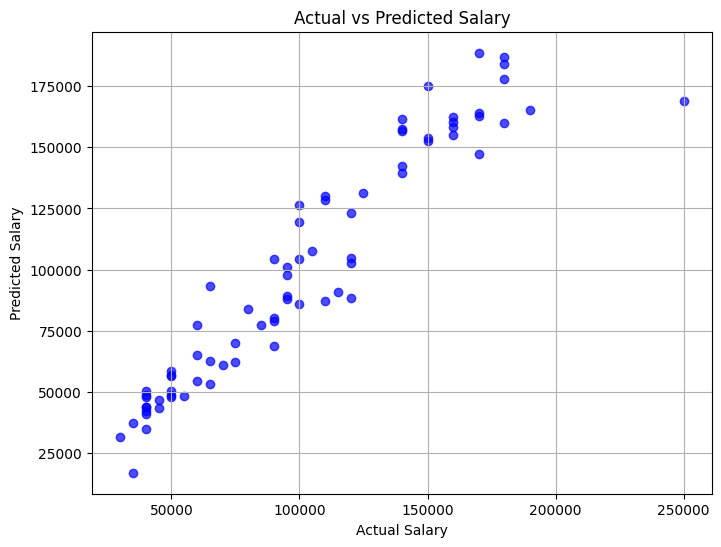


Predicted Salary for new employee: ₹70966.16


In [1]:
# Employee Salary Prediction Project

# Step 1: Upload your CSV file
from google.colab import files
uploaded = files.upload()  # Choose your CSV file

# Step 2: Get the uploaded file name automatically
import io
import pandas as pd
file_name = next(iter(uploaded))  # This gets the name of the uploaded file

# Step 3: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 4: Load dataset
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
print("First 5 rows of data:")
print(df.head())

# Step 5: Handle missing values
df.fillna(method='ffill', inplace=True)

# Step 6: Encode categorical columns
label_encoders = {}
for column in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Step 7: Define features (X) and target (y)
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df['Salary']

# Step 8: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Make predictions
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
print("\nModel Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 12: Compare actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted Salaries:")
print(results.head())

# Step 13: Visualization - Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()

# Step 14: Predict salary for a new employee
new_employee = pd.DataFrame({
    'Age': [30],
    'Gender': [label_encoders['Gender'].transform(['Male'])[0]],
    'Education Level': [label_encoders['Education Level'].transform(["Master's"])[0]],
    'Job Title': [label_encoders['Job Title'].transform(['Data Analyst'])[0]],
    'Years of Experience': [5]
})

predicted_salary = model.predict(new_employee)
print(f"\nPredicted Salary for new employee: ₹{predicted_salary[0]:.2f}")
